# AR model(Autoregressive model)
- '자기자신이 스스로 자기자신에게 영향을 미치는'이라는 뜻

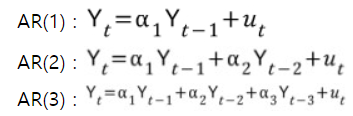

- 전 시점의 Y가 현 시점의 Y에 영향을 주는 자기자신에 대한 함수 

- https://statkclee.github.io/statistics/stat-time-series-arma.html

- https://otexts.com/fppkr/AR.html

시계열 데이터 
 - 시간(time)의 흐름에 따라 변화하는 데이터로 주가, 환율, 물가 데이터

- 현재 시점의 값은 이전 시점의 값에 상수(a)를 곱해준 것과 유사하고, 찌꺼기 정도의 차이만 있다. 

- 이 모형을 AR (Autoregressive) 모형이라 하고 , 바로 이전 시점 (t-1 시점) 까지만 고려하면  AR(1), 그 이전 까지 모두 고려해 주면 일반적으로 AR(p) 모형

- 아래 AR(1) , AR(2)결과는 AR(1)이 더좋음

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('ggplot')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/hare.dat'

df=  pd.read_csv(path)

df.index = pd.date_range("1905","1935", freq="AS")


df.loc[:'1925-01-01','pred'] = df.loc[:'1925-01-01','hare']

display(df.tail(15))

## AR(1)

In [ ]:
arma = ARMA(df.loc[:'1925-01-01', "pred"], (1,0))

result = arma.fit()

In [ ]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -88.577
Method:                       css-mle   S.D. of innovations             16.183
Date:                Wed, 01 Sep 2021   AIC                            183.153
Time:                        01:25:43   BIC                            186.287
Sample:                    01-01-1905   HQIC                           183.833
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2223     10.206      4.137      0.001      22.220      62.225
ar.L1.pred     0.6846      0.148      4.616      0.000       0.394       0.975
                                    Roots           

In [ ]:
predict = result.predict(start = "1926-01-01", end = '1935-01-01')
df.loc['1926-01-1':,"pred"] = predict

In [ ]:
df.tail(15)

In [ ]:
plt.figure(figsize = (20, 10))
df.loc[: ,'hare'].plot(color = 'b', marker = 'o')
df.loc['1925-01-01': ,'pred'].plot(color = 'r', marker = 'x')

In [ ]:
# 시계열 데이터 예측 성능 측정
# MSE (Mean squred Error)  :  (진짜 - 예측)**2의 합 / 데이터수

# 오차(residual, cost, error)
cost = df.loc['1926-01-1':,"hare"] - df.loc['1926-01-1':,"pred"]
df.loc['1926-01-01':, 'residual'] = cost

# 오차 제곱
print(df.loc["1926-01-01": , "residual"] ** 2)
print("="*50)

# 제곱합
print("오차 합:",(df.loc["1926-01-01": , "residual"] ** 2).sum())
print("="*50)

# 데이터 수
print("데이터 수 : " ,len(df.loc["1926-01-01": , "residual"]))
print("="*50)

# MSE
print("MSE :",\
(df.loc["1926-01-01": , "residual"] ** 2).sum() / len(df.loc["1926-01-01": , "residual"])
)
print("="*50)

# MSE 함수
print("MSE 함수")
mean_squared_error(df.loc["1926-01-01": , "hare" ] , df.loc["1926-01-01": , "pred" ])

1926-01-01     259.721096
1927-01-01     606.065053
1928-01-01    1297.177838
1929-01-01    1343.816161
1930-01-01    1352.922918
1931-01-01     344.163238
1932-01-01    1150.668684
1933-01-01    2868.759480
1934-01-01    1318.695564
1935-01-01     477.650909
Freq: AS-JAN, Name: residual, dtype: float64
오차 합: 11019.640942083002
데이터 수 :  10
MSE : 1101.9640942083001
MSE 함수


1101.9640942083001

## AR(2)

In [ ]:
# ARMA(진짜 값, (p,g))
# p : 과거 데이터 p개
# g : 몇개의 데이터 MA(moving average) 
arma = ARMA(df.loc[ :'1925-01-01',"pred"],(2,0))

result = arma.fit()

print(result.summary())

In [ ]:
# 예측
prediction = result.predict(start="1926-01-01", end="1935-01-01")

# 예측 값 pred컬럼에 추가
df.loc["1926-01-01":, "pred"] = prediction

#
df.tail(15)

In [ ]:
cost = df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"]
print(cost)

# MSE 함수
print("MSE 함수")
mean_squared_error(df.loc["1926-01-01": , "hare" ] , df.loc["1926-01-01": , "pred" ])

1926-01-01    10.749143
1927-01-01     4.149029
1928-01-01   -23.411939
1929-01-01   -45.085110
1930-01-01   -59.181849
1931-01-01   -42.407979
1932-01-01    19.181399
1933-01-01    51.924613
1934-01-01    44.807618
1935-01-01   -10.141983
Freq: AS-JAN, dtype: float64
MSE 함수


1318.9146319339857

## AR(3)

In [ ]:
arma = ARMA(df.loc[ :'1925-01-01',"pred"],(3,0))

result = arma.fit()

print(result.summary())

prediction = result.predict(start = "1926-01-01", end = "1935-01-01")

df.loc["1926-01-01": , "pred"] = prediction

df.loc["1926-01-01": , "residual"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

print("=" * 100)
print("MSE")
mean_squared_error(df.loc['1926-01-01' : ,"hare"], df.loc["1926-01-01": , "pred"])

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(3, 0)   Log Likelihood                 -90.255
Method:                       css-mle   S.D. of innovations              8.159
Date:                Wed, 01 Sep 2021   AIC                            190.510
Time:                        06:22:52   BIC                            195.733
Sample:                    01-01-1905   HQIC                           191.644
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6043        nan        nan        nan         nan         nan
ar.L1.pred     0.8958   4.75e-06   1.88e+05      0.000       0.896       0.896
ar.L2.pred     0.0587   3.98e-07   1.47e+05      0.0

1174.9662467246856

## ARIMA

In [ ]:
p = range(1, 11)

q ,d= [0] ,[0]

In [ ]:
order_list = list( itertools.product(p,d,q) )
order_list

[(1, 0, 0),
 (2, 0, 0),
 (3, 0, 0),
 (4, 0, 0),
 (5, 0, 0),
 (6, 0, 0),
 (7, 0, 0),
 (8, 0, 0),
 (9, 0, 0),
 (10, 0, 0)]

In [ ]:
for order in order_list:
  print(order)
  arima = ARIMA(df.loc[: '1925-01-01',"pred"],order)
  results = arima.fit()

  print('aic = ', results.aic)
  print("=" * 100)

# 실습


In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 전처리
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/hare.dat'

df=  pd.read_csv(path)

df.index = pd.date_range("1905","1935", freq="AS")

# df["pred"] = 0
# df["pred"] = df.loc[:'1925-01-01','hare']

# pred행 추가 (1926년 이후 부터는 0 , 그 전은 "hare"와 동일)
df["pred"] = [a  if x < datetime(1926, 1, 1) else 0 for x,a in zip(df.index ,df['hare'])]

In [ ]:
df# pred행 추가 (1926년 이후 부터는 0 , 그 전은 "hare"와 동일)

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -88.577
Method:                       css-mle   S.D. of innovations             16.183
Date:                Wed, 01 Sep 2021   AIC                            183.153
Time:                        08:47:48   BIC                            186.287
Sample:                    01-01-1905   HQIC                           183.833
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2223     10.206      4.137      0.001      22.220      62.225
ar.L1.pred     0.6846      0.148      4.616      0.000       0.394       0.975
                                    Roots           

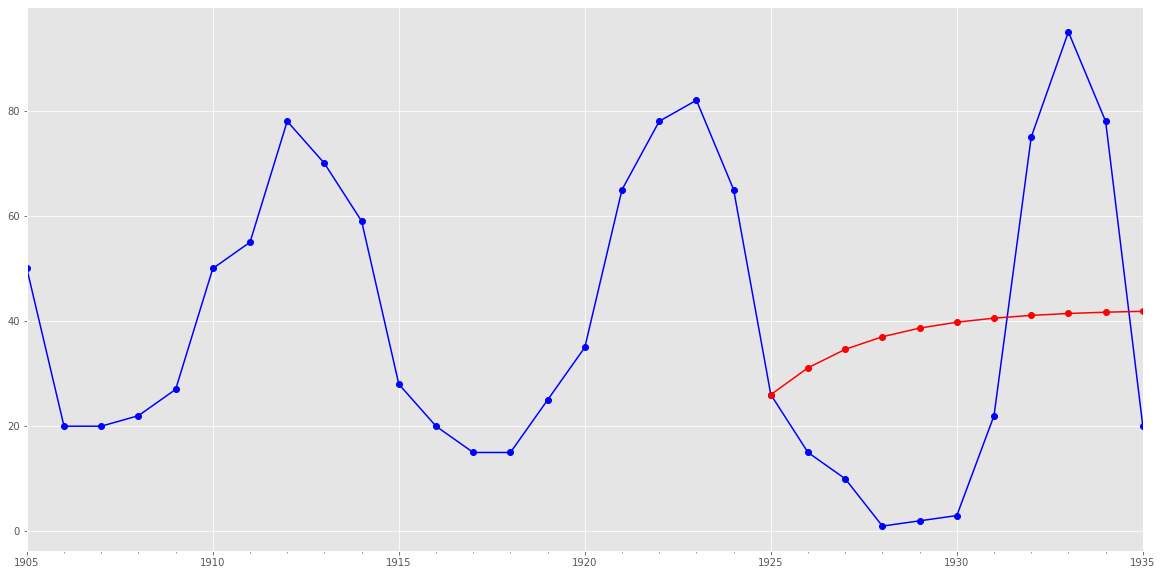

In [ ]:
# AR1
arma = ARMA(df.loc[:'1925-01-01',"pred"],(1,0)).fit()
print(arma.summary())

predict = arma.predict(start = "1926-01-01", end = '1935-01-01')

df.loc["1926-01-01" : ,"pred"] = predict
df.loc["1926-01-01": , "residual_AR_1"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

# 시각화
plt.figure(figsize = (20,10))
df.loc[:,"hare"].plot(color = 'b', marker = 'o')
df.loc['1925-01-01':,"pred"].plot(color = 'r', marker = 'o')

In [ ]:
# AR2
arma = ARMA(df.loc[:'1925-01-01','pred'],(2,0)).fit()

print(arma.summary())

predict = arma.predict(start = "1926-01-01", end = "1935-01-01")

df.loc["1926-01-01" : ,"pred"] = predict
df.loc["1926-01-01": , "residual_AR2"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

# 시각화
plt.figure(figsize = (20,10))
df.loc[:,"hare"].plot(color = 'b', marker = 'o')
df.loc['1925-01-01':,"pred"].plot(color = 'r', marker = 'o')

In [ ]:
# AR3
arma = ARMA(df.loc[:'1925-01-01',"pred"],(3,0)).fit()
print(arma.summary())

predict = arma.predict(start = "1926-01-01", end = '1935-01-01')

df.loc["1926-01-01" : ,"pred"] = predict
df.loc["1926-01-01": , "residual_AR3"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

# 시각화
plt.figure(figsize = (20,10))
df.loc[:,"hare"].plot(color = 'b', marker = 'o')
df.loc['1925-01-01':,"pred"].plot(color = 'r', marker = 'o')

In [ ]:
df.tail(15)

,hare,pred,residual_AR1,residual_AR2,residual_AR3
1921-01-01,65,65.000000,NaN,NaN,NaN
1922-01-01,78,78.000000,NaN,NaN,NaN
1923-01-01,82,82.000000,NaN,NaN,NaN
1924-01-01,65,65.000000,NaN,NaN,NaN
1925-01-01,26,26.000000,NaN,NaN,NaN
1926-01-01,15,1.760791,-16.115865,10.749143,13.239209
1927-01-01,10,-10.777037,-24.618389,4.149029,20.777037
1928-01-01,1,2.867297,-36.016355,-23.411939,-1.867297
1929-01-01,2,30.697995,-36.658098,-45.085110,-28.697995
1930-01-01,3,64.882334,-36.782101,-59.181849,-61.882334
